In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [5]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [7]:
# Convert date to datetime

#df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-10-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2020_2022 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2020_2022.dtypes

Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

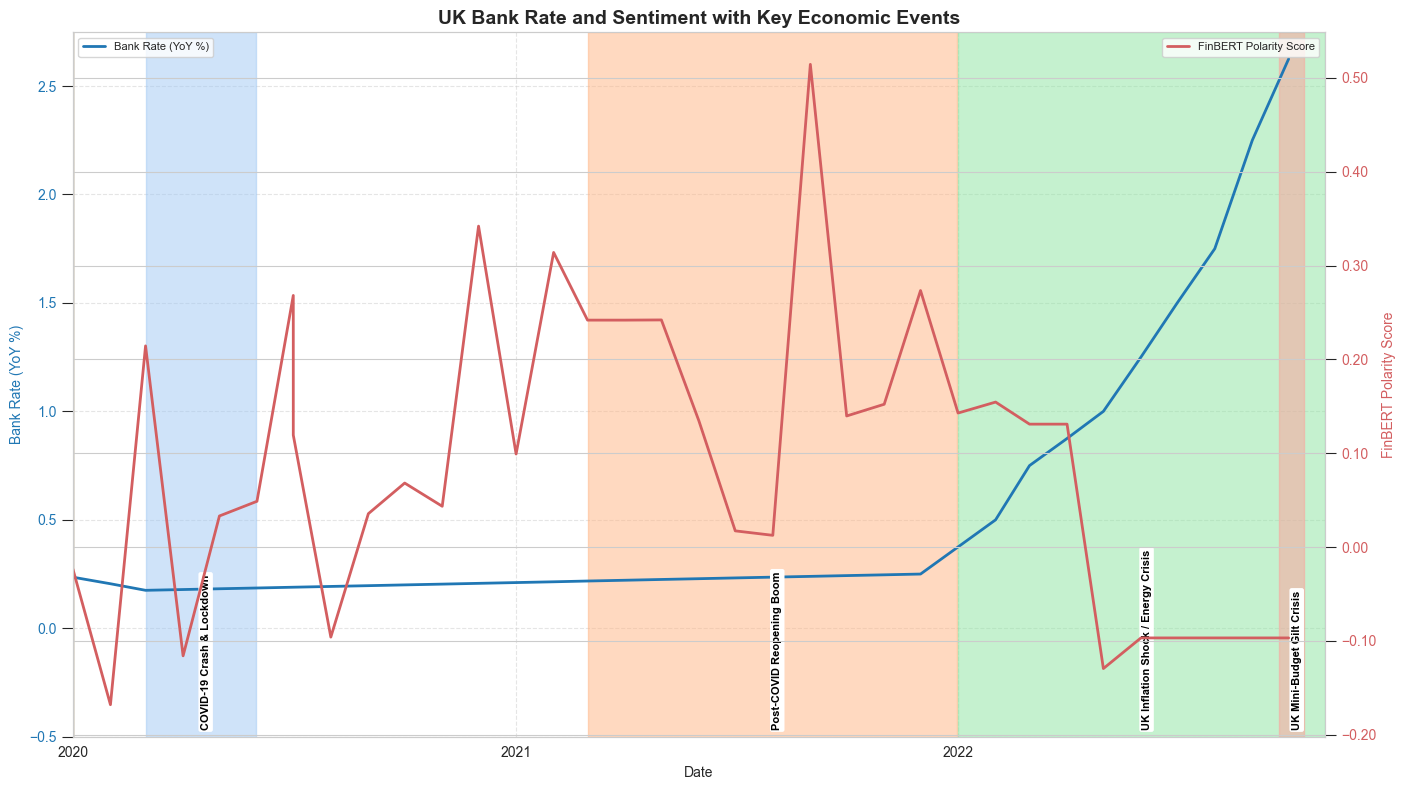

In [12]:
# Filter data from 1 Jan 2020 onwards
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2022-10-31')
df_plot = df_uk_2020_2022[
    (df_uk_2020_2022['Date'] >= start_date) & (df_uk_2020_2022['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that Bank Rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

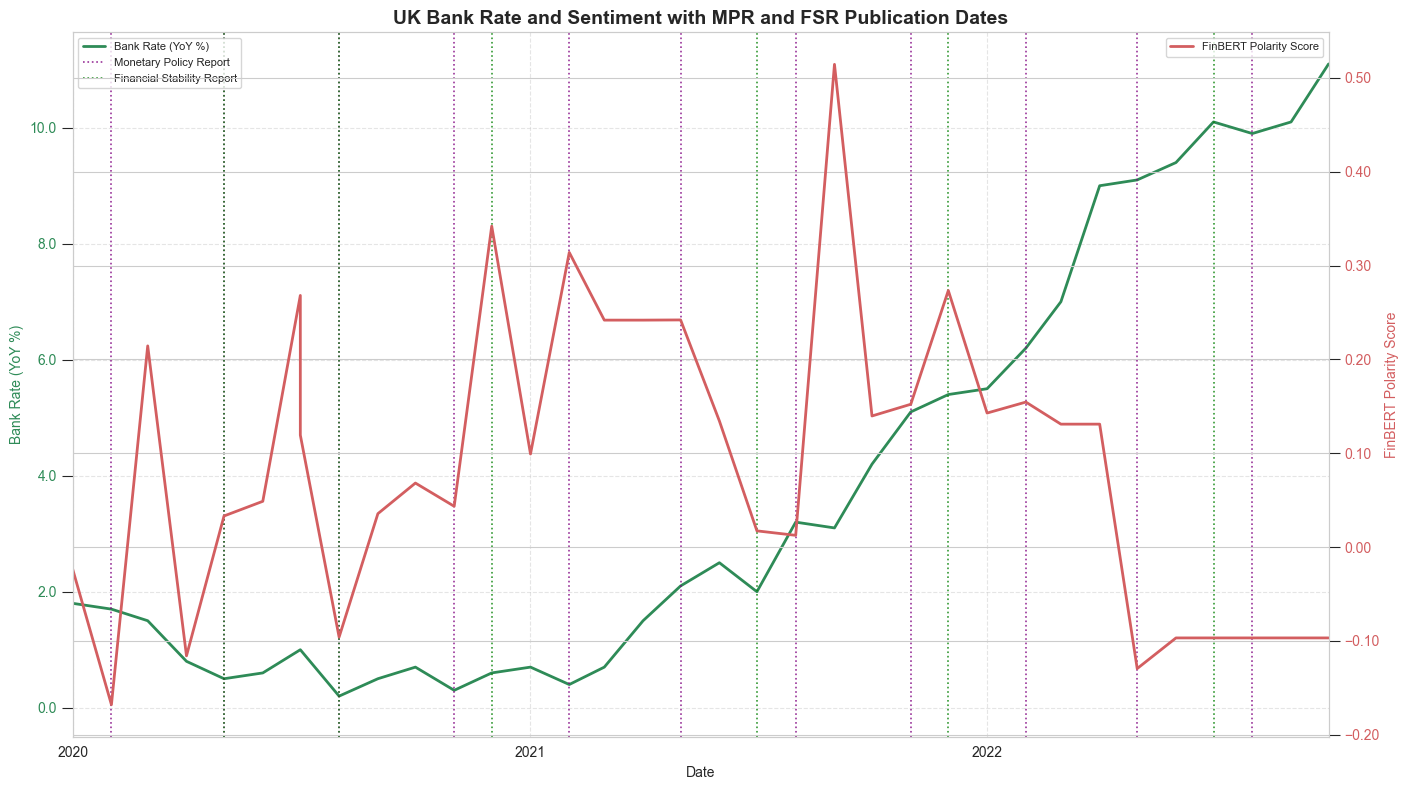

In [13]:
start_date = pd.to_datetime('2020-01-01')
df_plot2 = df_uk_2020_2022[df_uk_2020_2022['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bank Rate Line (Left Axis)
color_bank_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Bank Rate (YoY %)', color=color_bank_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['CPI'], color=color_bank_rate, label='Bank Rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_bank_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK Bank Rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

* Rising rates reflect central bank attempts to cool inflation, especially post-2021.

* Sentiment diverges from rate trends: despite higher rates, sentiment falls sharply, suggesting market anxiety or distrust.

* Publication dates (MPR & FSR) often cluster around inflection points, reinforcing their role as catalysts or reflections of broader economic conditions.

### Drop unncessary columns to reduce the number of variables to be explored

In [15]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2020_2022.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [16]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [17]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
364,2020-01-01,1.8,-0.023449,-9.0,3.9,2.9,-2.7,16484.53341,0.235526,188.237
365,2020-02-01,1.7,-0.167942,-7.0,4.1,2.8,-2.7,15082.33282,0.205263,188.494
366,2020-03-01,1.5,0.214355,-34.0,4.1,2.2,-20.3,11804.71828,0.175000,189.074
367,2020-04-01,0.8,-0.115880,-33.0,4.1,0.9,-20.3,12892.18801,0.178571,189.179
368,2020-05-01,0.5,0.033131,-36.0,4.1,-0.4,-20.3,13365.07954,0.182143,189.223


# Correlation analysis

### Create pairplot for visual correlation analysis

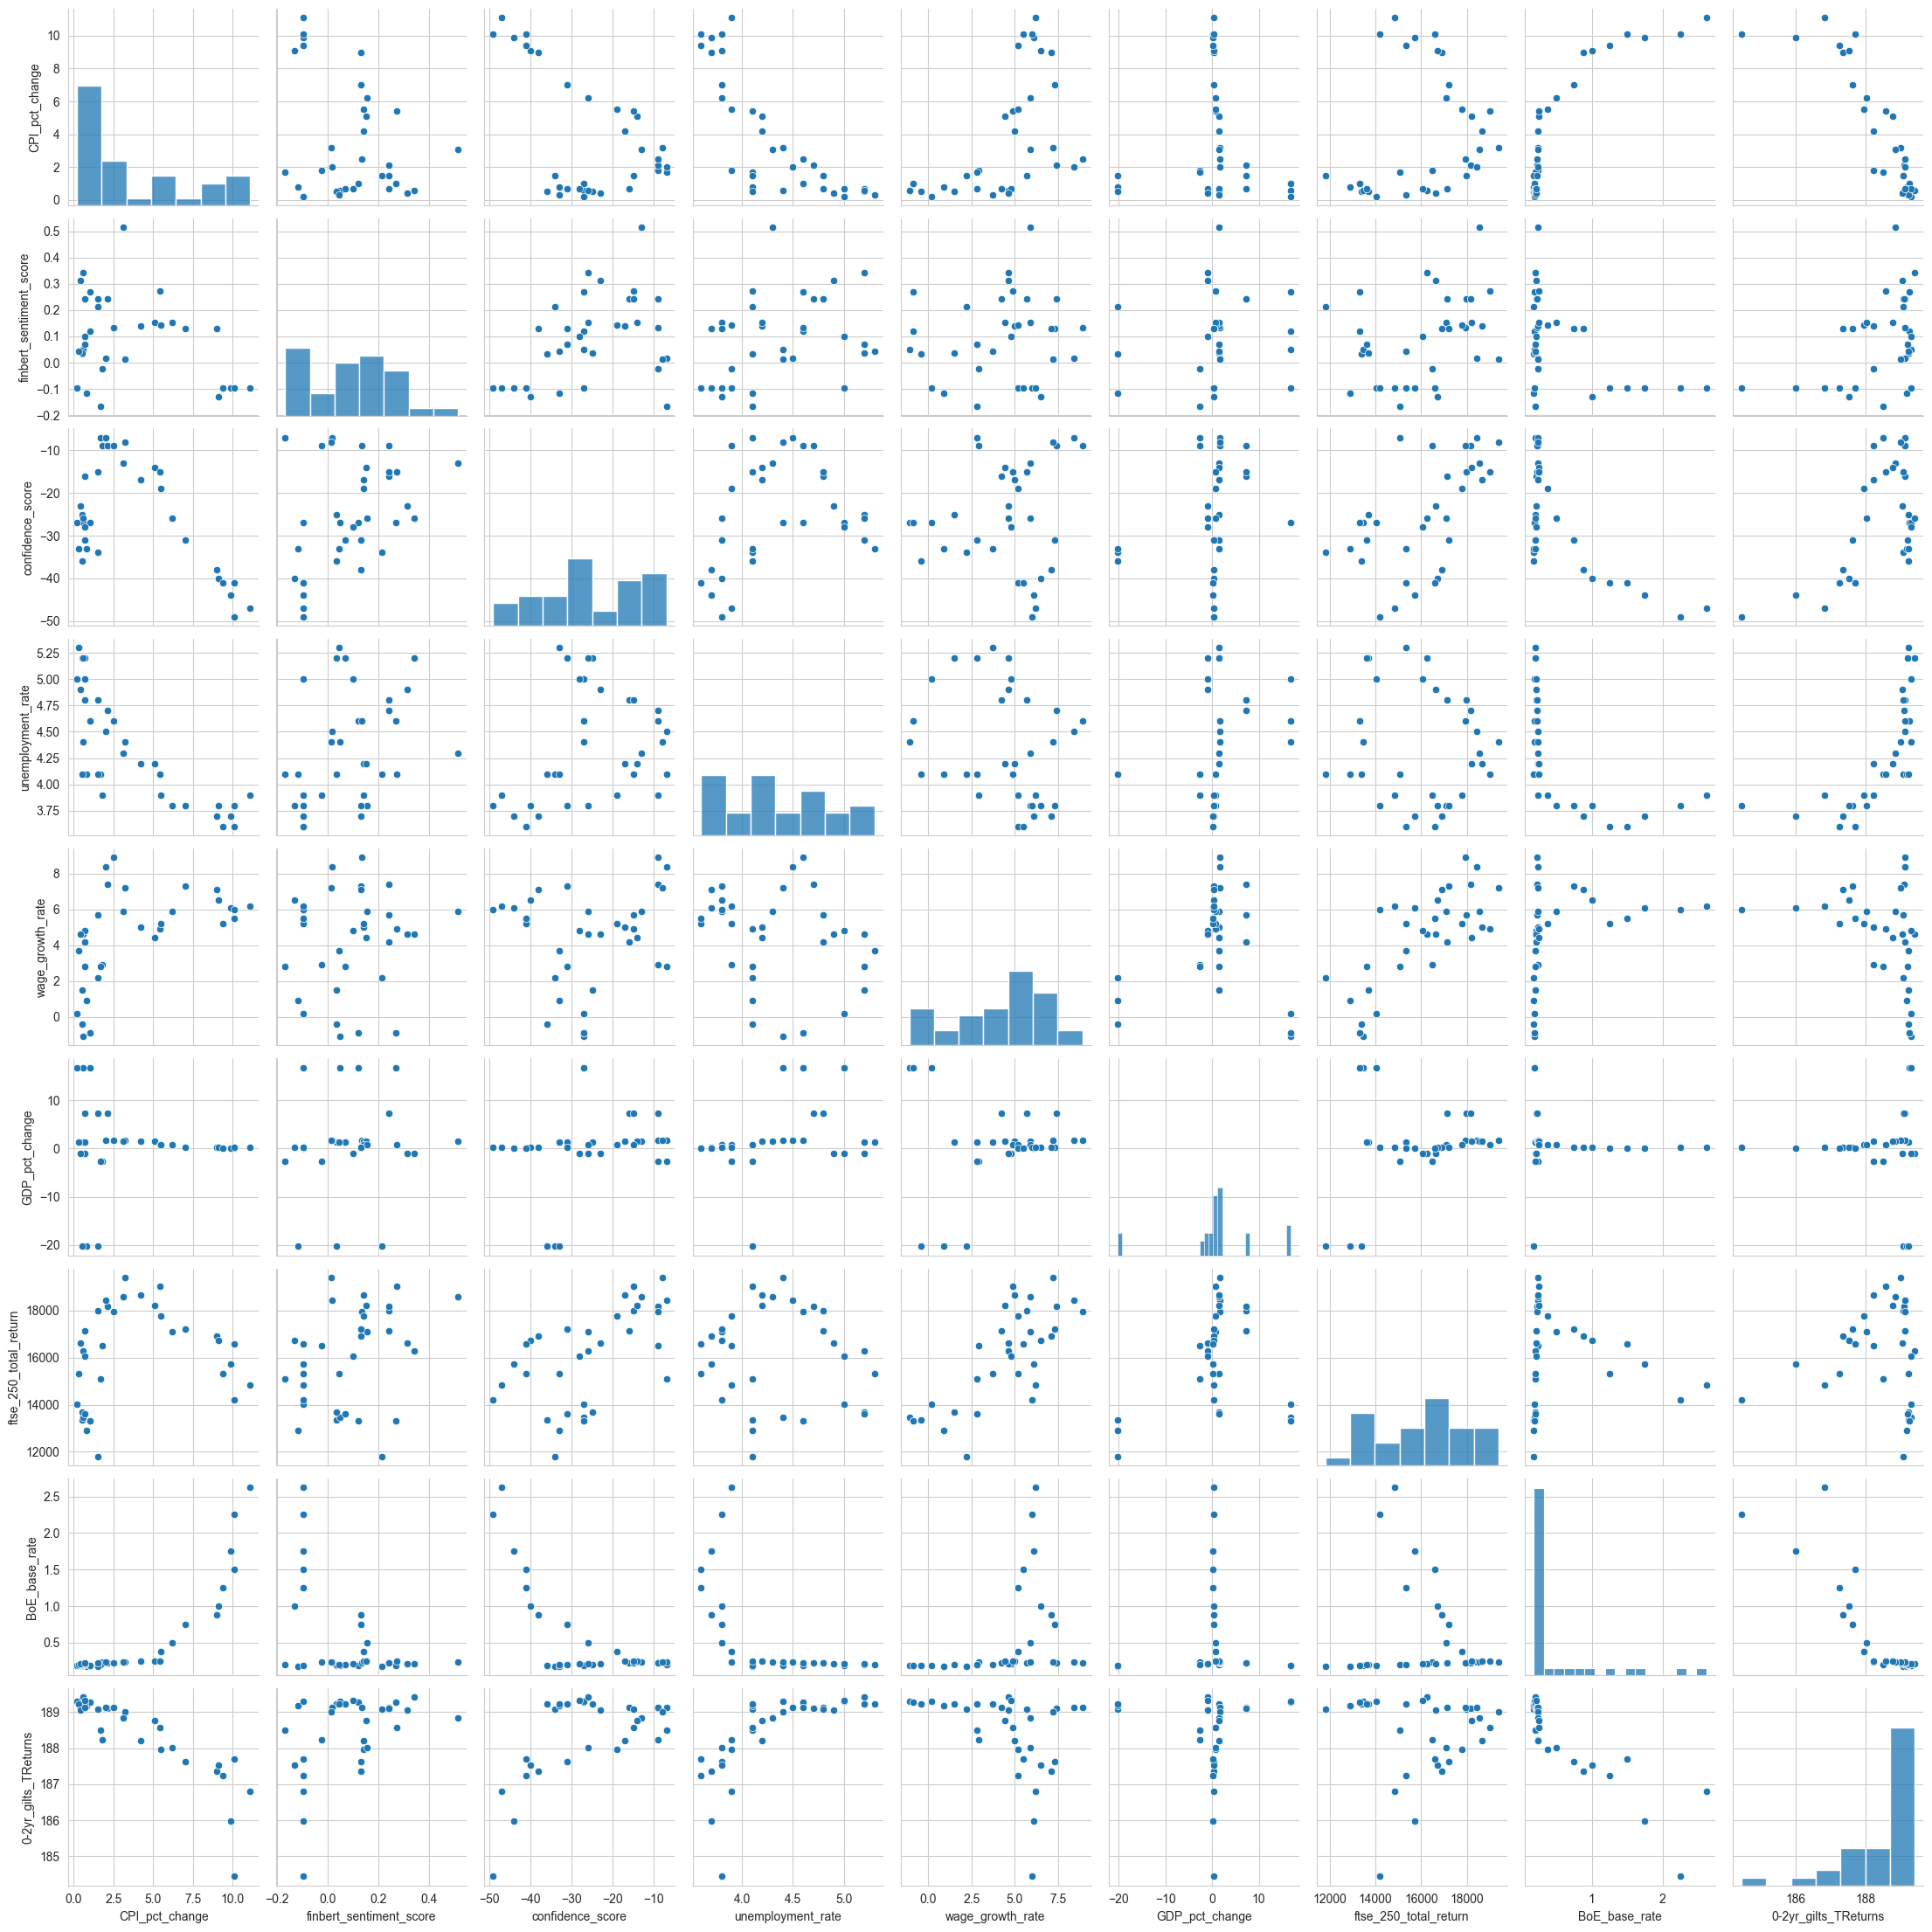

In [18]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

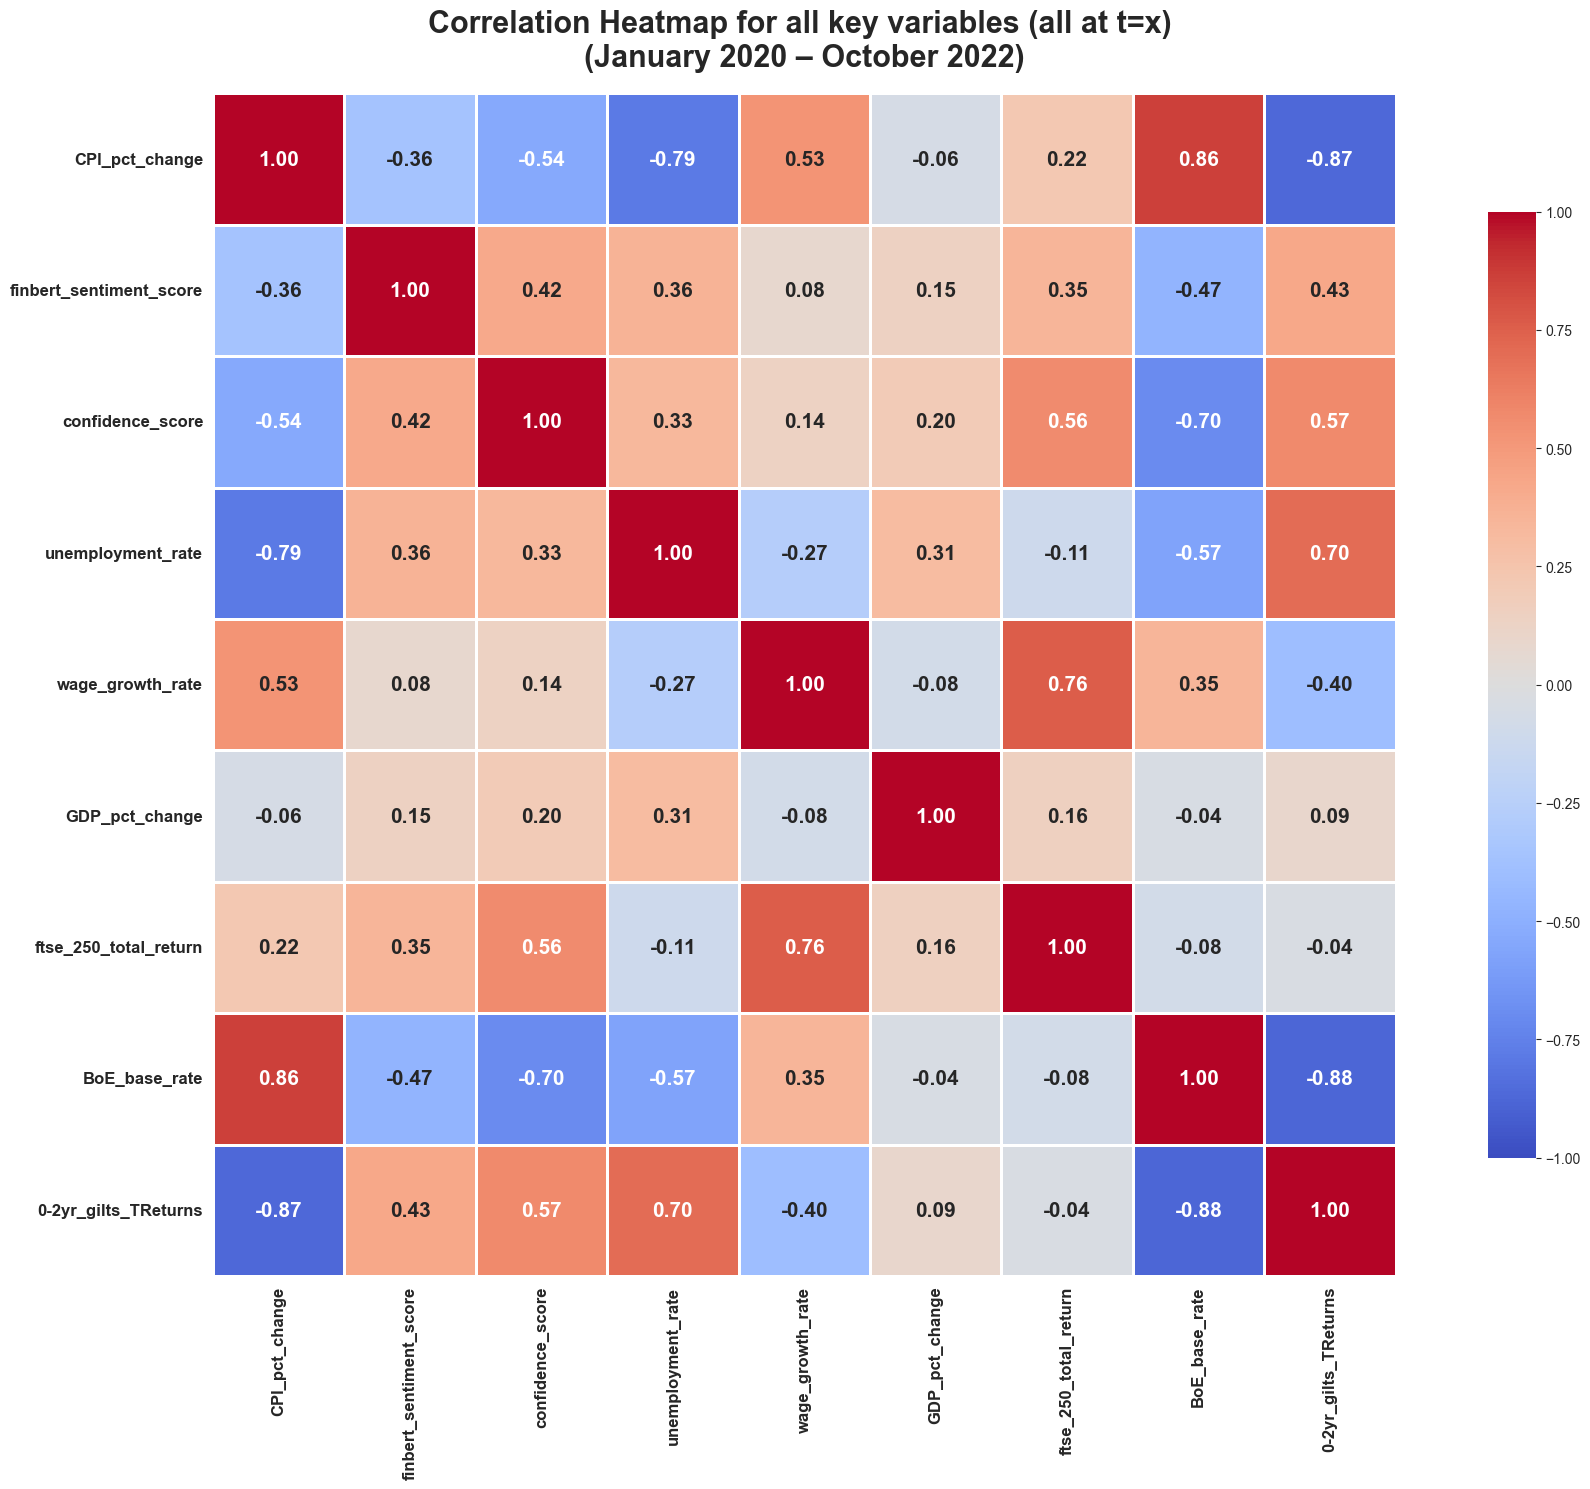

In [19]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(January 2020 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

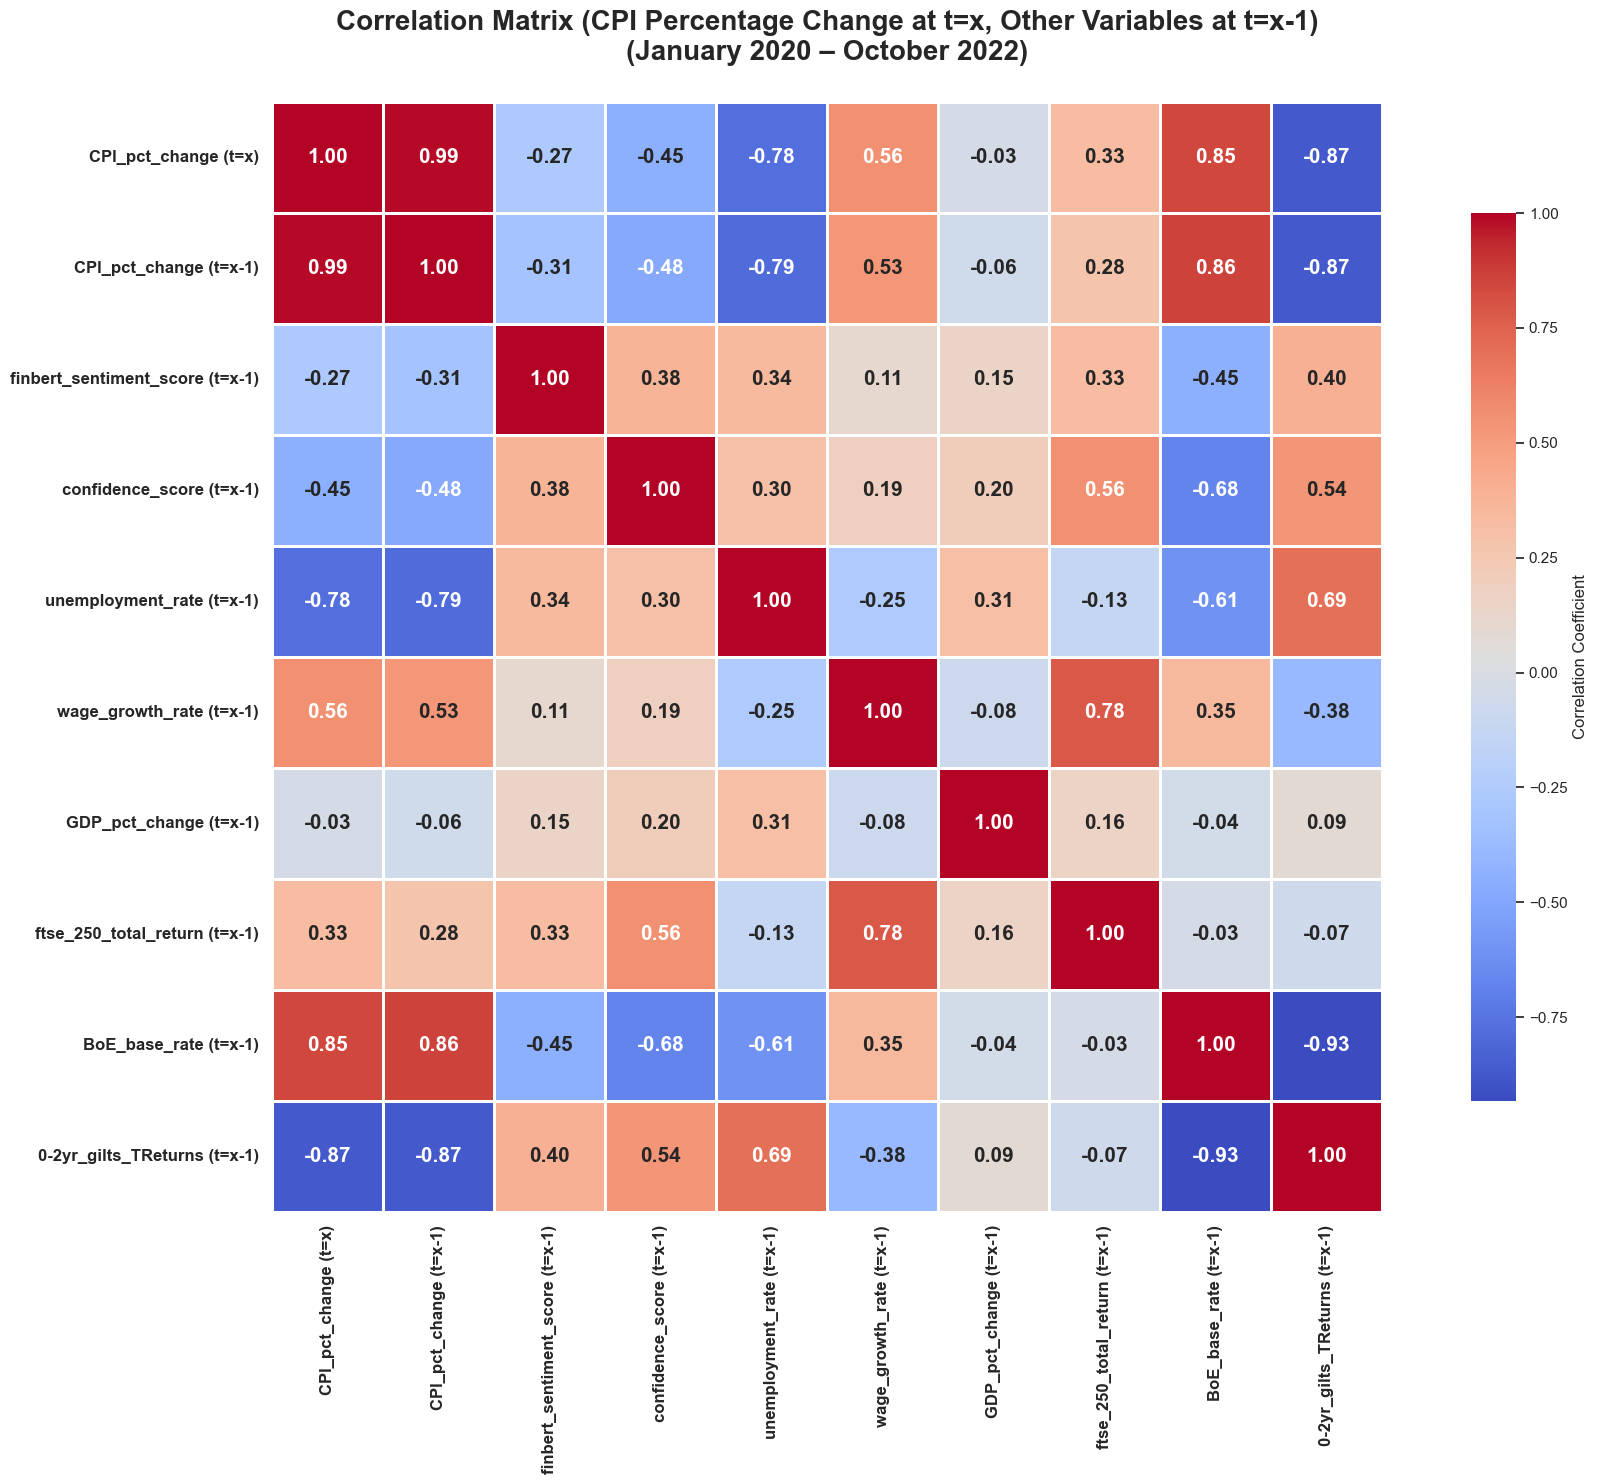

In [229]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['CPI_pct_change']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'CPI_pct_change': 'CPI_pct_change (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (CPI Percentage Change at t=x, Other Variables at t=x-1)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

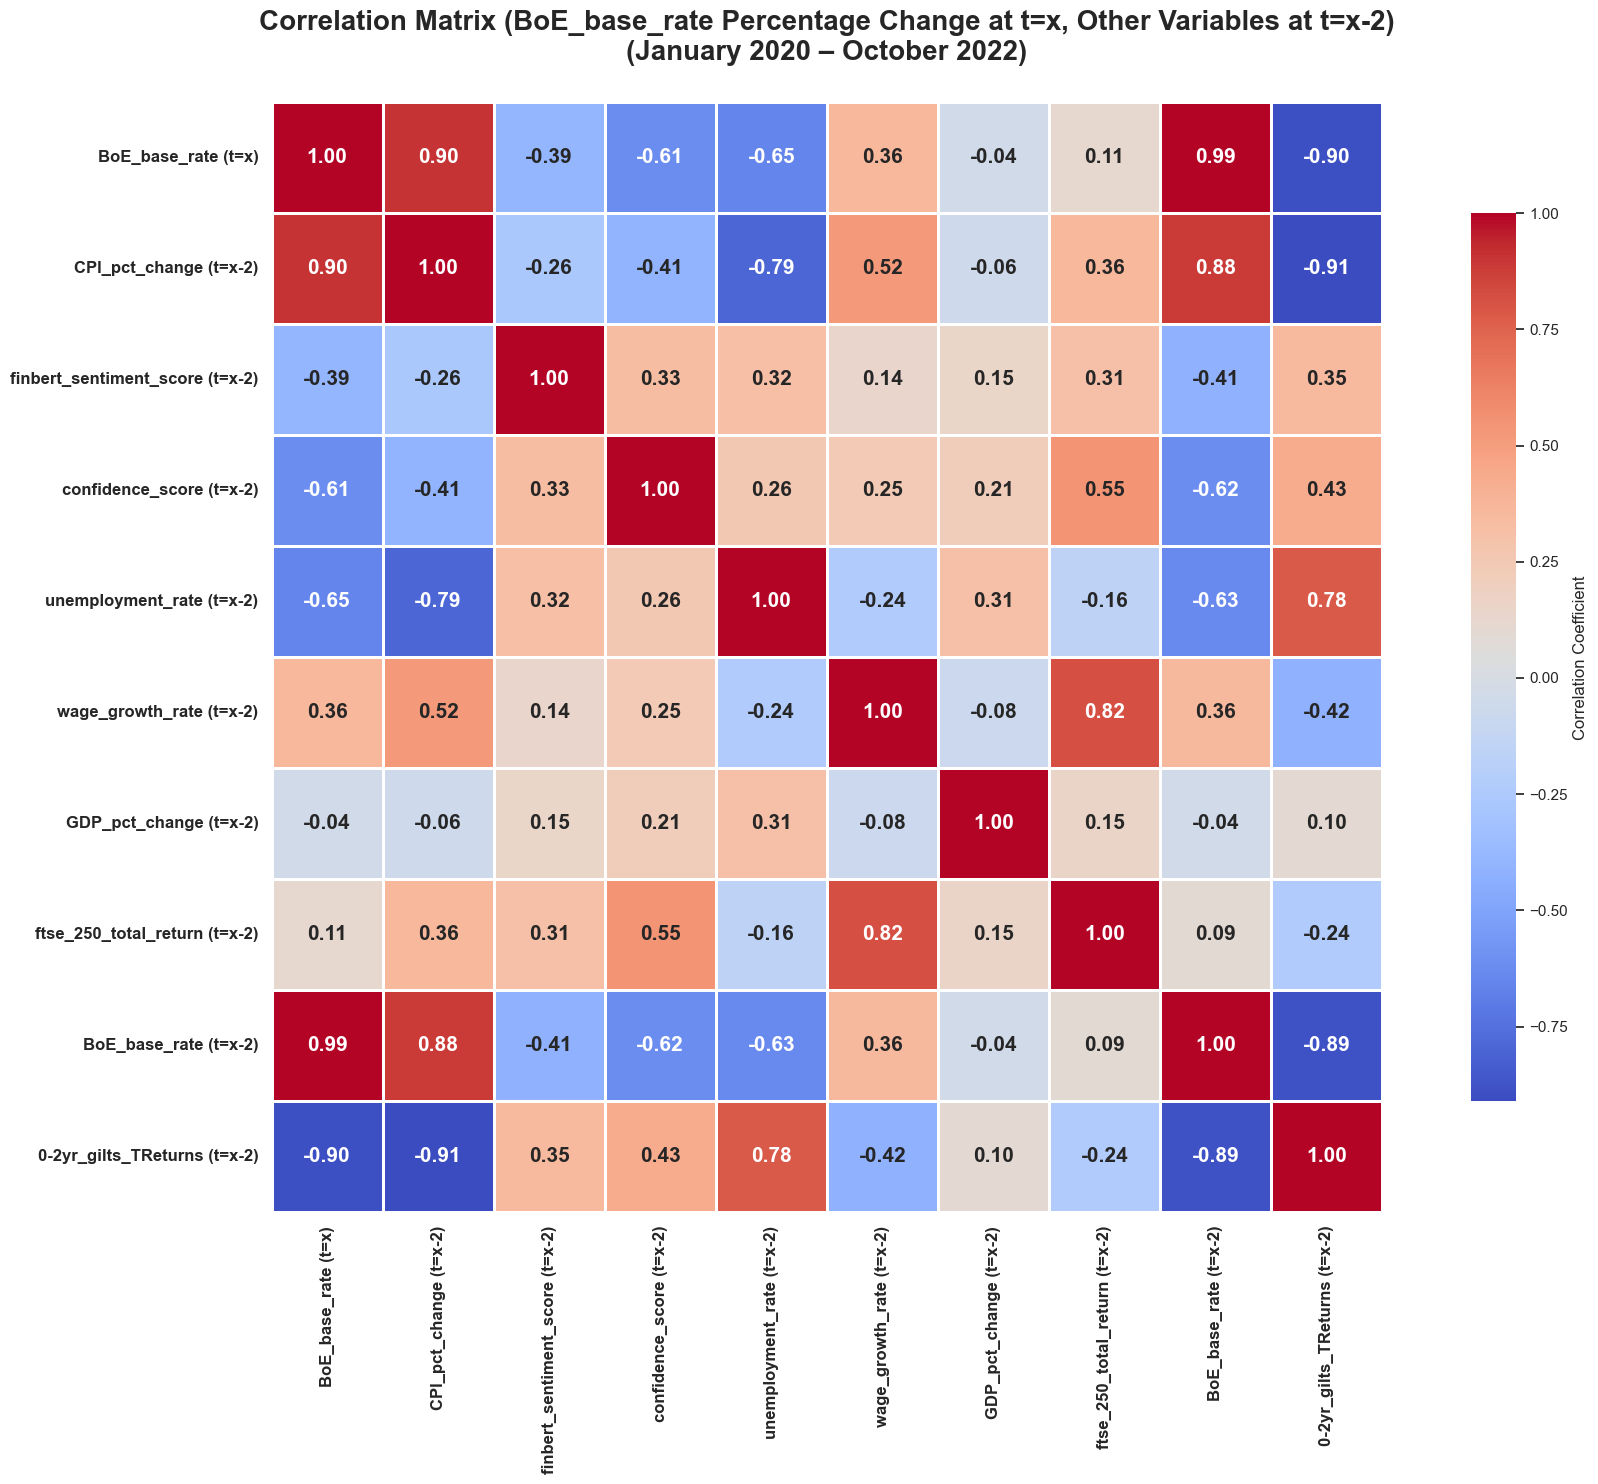

In [20]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

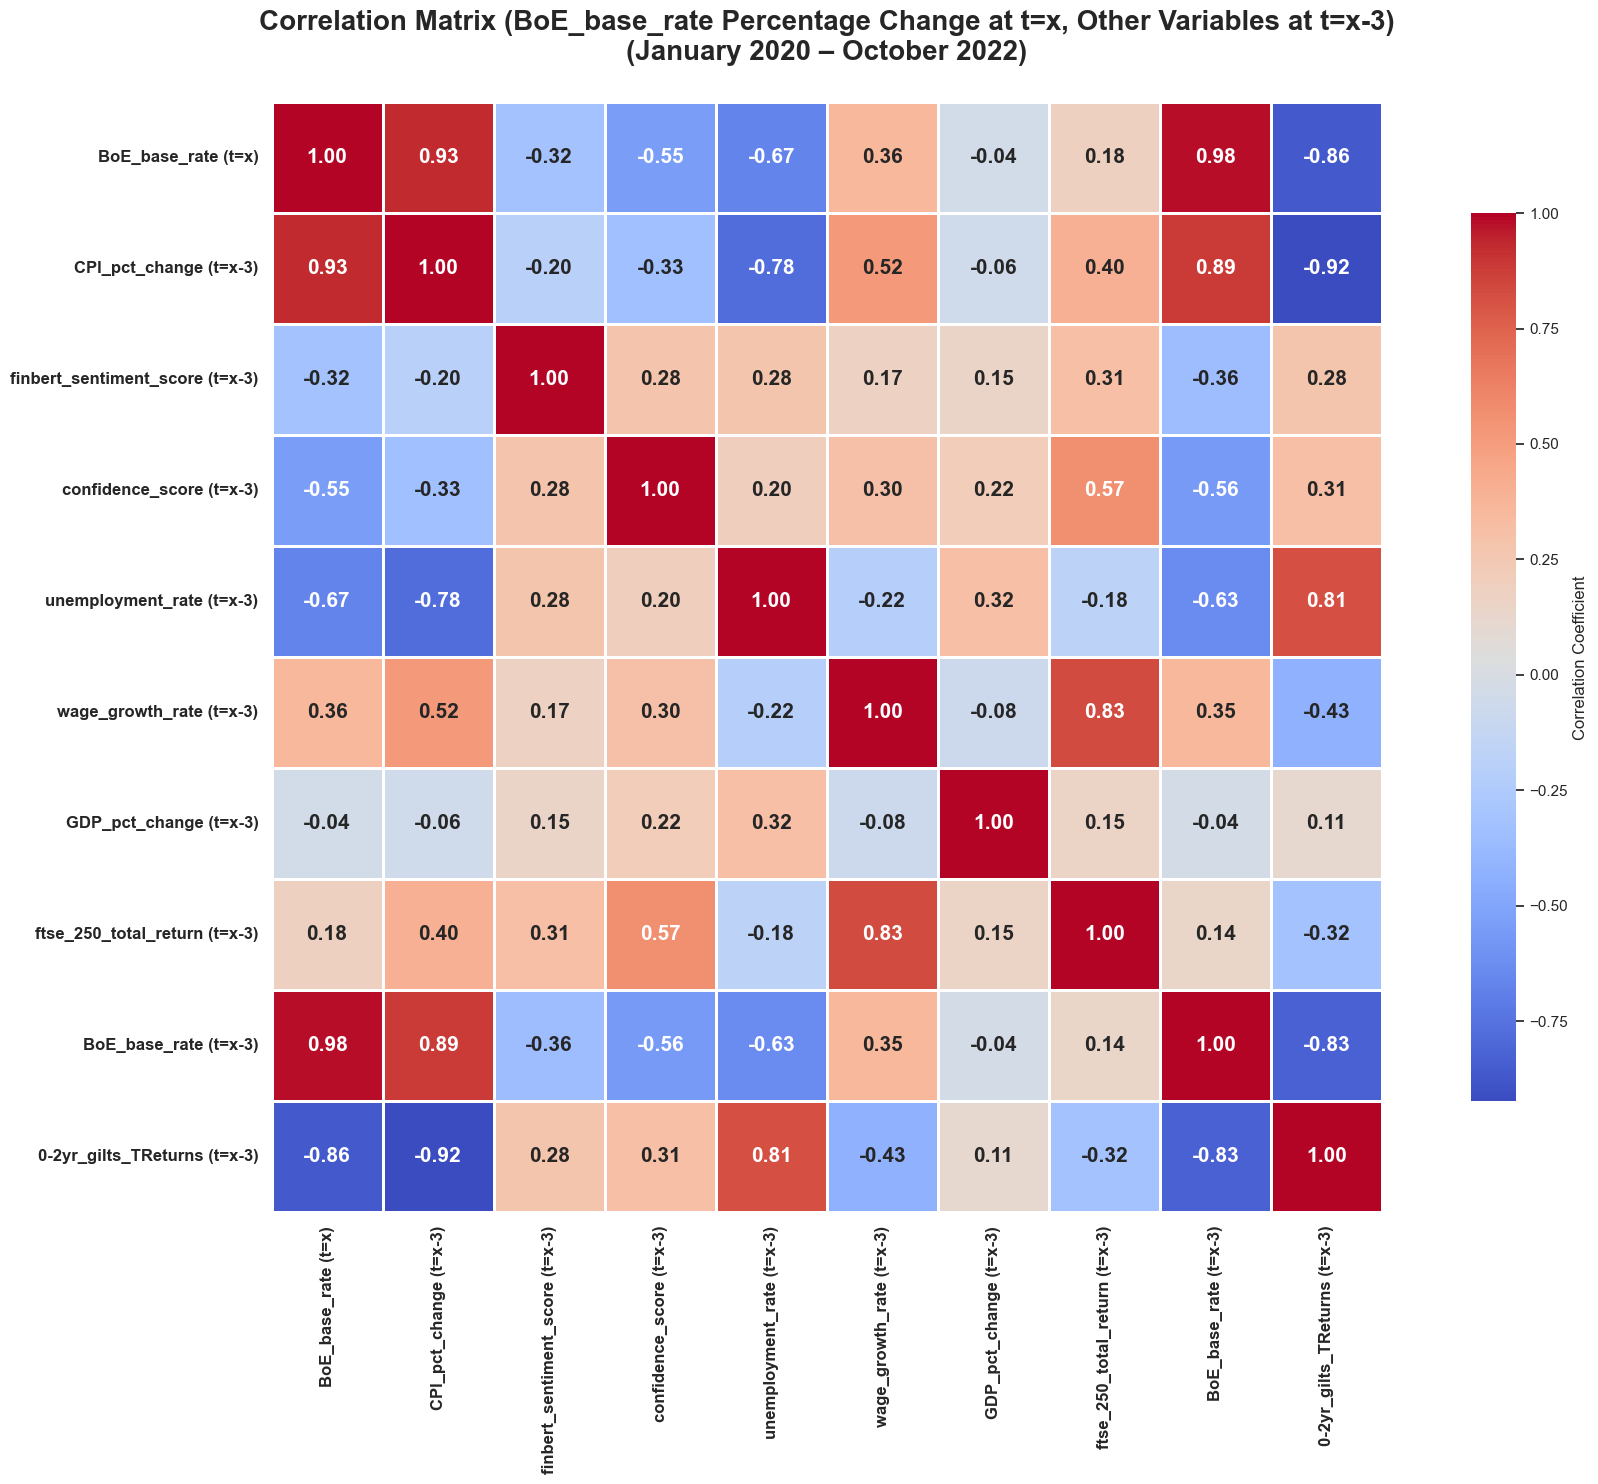

In [22]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2020 – 10/2022
start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(January 2020 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
🔺 Strong positive correlations with BoE base rate (at time t):

Variable	Correlation	Insight
CPI_pct_change (t)	+0.80	Inflation (CPI) now is strongly aligned with current base rate increases.

CPI_pct_change (t-3)	+0.89	Even past inflation strongly predicts current rate hikes.

Wage_growth_rate (t-3)	+0.83	Wage pressure leads to future rate hikes.

Unemployment_rate (t-3)	+0.81	Surprising — possibly due to lags in monetary policy effects or measurement timing.

FTSE_250_total_return (t-3)	+0.83	Positive returns may coincide with a tightening cycle.

🔻 Strong negative correlations with BoE base rate:

Variable	Correlation	Insight

0-2yr_gilts_TRReturns (t-3)	-0.83	Rising rates hurt short-term bond returns (expected).

Unemployment_rate (t)	-0.63	As rates rise, unemployment may eventually fall (or reflect cyclical timing).

FinBERT sentiment (t-3)	-0.56	Negative sentiment precedes rate hikes — perhaps as a reaction to anticipated tightening.

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: Bank Rate vs Lagged Bank Rate, Consumer Confidence Score, Wage Growth and FTSE250 Total Returns

### Prepare regression dataframe

In [32]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2020-01-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate'].shift(3)
regression_df['ftse_250_total_return (t=x-3)'] = filtered_df['ftse_250_total_return'].shift(3)
regression_df['CPI_pct_change (t-3)'] = filtered_df['CPI_pct_change'].shift(3)

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),BoE_base_rate (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),CPI_pct_change (t-3)
BoE_base_rate (t=x),1.000000,0.996721,-0.728699,0.359489,0.181986,0.927847
BoE_base_rate (t=x-1),0.996721,1.000000,-0.720661,0.357773,0.166824,0.914156
confidence_score (t=x),-0.728699,-0.720661,1.000000,0.125409,0.254161,-0.677789
wage_growth_rate (t=x-3),0.359489,0.357773,0.125409,1.000000,0.828036,0.516021
ftse_250_total_return (t=x-3),0.181986,0.166824,0.254161,0.828036,1.000000,0.400856
CPI_pct_change (t-3),0.927847,0.914156,-0.677789,0.516021,0.400856,1.000000


In [33]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)', 'confidence_score (t=x)', 'wage_growth_rate (t=x-3)', 'ftse_250_total_return (t=x-3)','CPI_pct_change (t-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [34]:
# Call the predictions for X (array).
mlr.predict(X)

array([0.19811903, 0.19575787, 0.19123253, 0.18966786, 0.19700721,
       0.20530736, 0.21824632, 0.22122798, 0.1970927 , 0.19903214,
       0.19771335, 0.1896144 , 0.19824696, 0.2029007 , 0.2028924 ,
       0.2192969 , 0.23552361, 0.24258316, 0.24413408, 0.23937521,
       0.28765052, 0.29650161, 0.33622632, 0.49964926, 0.64245076,
       0.91265942, 1.06088406, 1.20866917, 1.53694581, 1.81768655,
       2.10548079, 2.67450967])

In [35]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.99558143305249
Intercept:  -0.060399894554350464
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(1.0977913702333144)),
 ('confidence_score (t=x)', np.float64(0.00015650300096071315)),
 ('wage_growth_rate (t=x-3)', np.float64(-0.007740903544163587)),
 ('ftse_250_total_return (t=x-3)', np.float64(2.8026057913700005e-06)),
 ('CPI_pct_change (t-3)', np.float64(0.026566112685540794))]

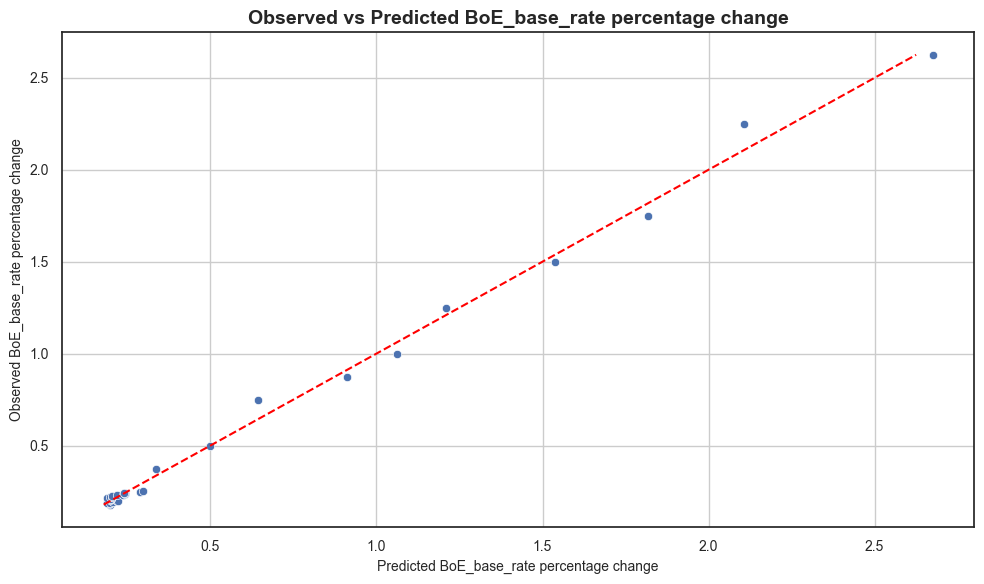

In [36]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Good correlation between the predicted and observed BoE_base_rate percentage change. This indicates that the model is capturing the overall direction of the relationship, albeit consistently with some variation as denoted by the scatter points situated further away from the red line.

Model Performance Looks Strong:

Most points lie very close to the red dashed line.

This indicates that the model's predictions are highly accurate — it captures both the trend and magnitude of changes in the BoE rate well.

No major systematic errors:

No clear signs of underestimation or overestimation across the range.

No clustering of large residuals (i.e., prediction errors).

* Conclusion

The regression model (likely using lagged macro variables like CPI, sentiment, wage growth, etc.) is very effective at predicting changes in the BoE base rate.

This supports earlier insights from the correlation matrix — strong leading indicators were well-leveraged in the model.



### Training and testing subsets with MLR

In [37]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [38]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     2181.
Date:                 Fri, 16 May 2025   Prob (F-statistic):           1.60e-25
Time:                         17:34:06   Log-Likelihood:                 58.239
No. Observations:                   25   AIC:                            -104.5
Df Residuals:                       19   BIC:                            -97.17
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

### <span style="color: orange;"> R-squared	0.998	Model explains 99.8% of the variation in the BoE rate — exceptionally strong.

### <span style="color: orange;"> Adj. R-squared	0.998	Very close to R² — no overfitting from unnecessary variables.

### <span style="color: orange;"> F-statistic	2181.0, p < 0.001	Model overall is highly statistically significant.

### <span style="color: orange;"> Durbin-Watson	1.784	Close to 2 — indicates no strong autocorrelation in residuals.

### <span style="color: orange;"> CPI_pct_change (t-3)	0.0238	0.003  Statistically significant — higher past inflation leads to higher base rate now.

### <span style="color: orange;"> BoE_base_rate (t-1)	1.0900	< 0.001  Strong predictor — the previous rate almost linearly determines the current o


The model is extremely accurate (R² = 0.998), mainly due to:

* The autoregressive nature of interest rate policy.

* Strong predictive value from past inflation data.



In [39]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [40]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [0.88872373 0.20231979 0.18615835 0.18927319 0.23726729 0.19405837
 0.20856256 0.19252648 0.47822708 0.18843383 0.19789668 1.03902911
 0.18844561 0.28968679 1.18868638 0.32103821 0.25468369 2.62934288
 0.28292704 0.20899481 0.20125055 0.20805717 1.5098153  0.24606745
 0.20781335]


In [41]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [1.78571683 0.21988088 0.61654082 0.24864813 0.18811924 0.19808728
 2.06948223]


In [42]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

98.80177779626521


### <span style="color: orange;"> R-square of 98.8% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but potential issues with multicollinearity remain

### Check for multicollinearity

In [43]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0       314.7                          const
1         6.6          BoE_base_rate (t=x-1)
2         4.4         confidence_score (t=x)
3         4.0       wage_growth_rate (t=x-3)
4         5.4  ftse_250_total_return (t=x-3)
5        12.6           CPI_pct_change (t-3)


### <span style="color: orange;"> Observations from the VIF output:

BoE_base_rate (t-1) has a VIF of 6.6, indicating moderate to high collinearity.

This is somewhat expected in time series models with autoregressive features.

Still, it suggests strong correlation with other predictors, especially CPI or market returns.

### Moderate Multicollinearity for Market & Sentiment Variables

ftse_250_total_return (t-3) has a VIF of 5.4

confidence_score (t=x) → VIF = 4.4

wage_growth_rate (t-3) → VIF = 4.0

These are within acceptable limits but suggest moderate correlation with each other or other inputs. Multicollinearity here might not yet be problematic, but should be monitored, especially with small datasets.

### - VIF of 314.7 for const is not interpreted  because it is not an independent variable, therefore having a high VIF doesn't indicate a problem with the model's predictive power of stability of the coefficients of the other variables

### Check for heteroscedasticity

In [44]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [45]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(8.111698992069824), 'LM Test p-value': np.float64(0.15018616767706797), 'F-stat': np.float64(1.8251958059837519), 'F-test p-value': np.float64(0.15594483466383735)}


### LM Statistic & p-value

LM stat = 8.11

LM p-value = 0.1502

This is the Lagrange Multiplier (LM) version of the heteroskedasticity test.

The null hypothesis (H₀): Homoskedasticity (constant variance of residuals)

The alternative (H₁): Heteroskedasticity (variance changes)

 Since p = 0.1502 > 0.05, we fail to reject the null hypothesis — no significant evidence of heteroskedasticity.

 F-statistic & p-value
F-stat = 1.8252

F-test p-value = 0.1559

This is an alternative version of the test based on an auxiliary regression.

 Again, p = 0.1559 > 0.05, so we fail to reject the null — the test confirms the residuals have constant variance. 

### There is no strong evidence of heteroskedasticity in your model. This means:

OLS assumptions about residual variance are reasonably valid.

Coefficients and standard errors are likely trustworthy from a heteroskedasticity standpoint.

### Check normality of regression residuals - assumption of MLR

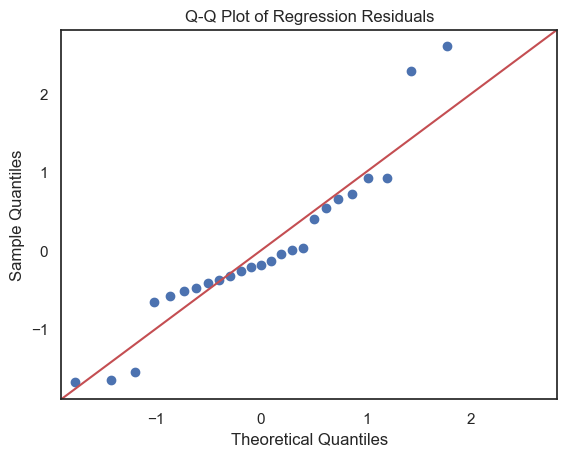

In [46]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### The central values (around 0) fall fairly close to the red line, which is good.

However, the tails (both ends) deviate noticeably:

Right tail (top-right corner): Higher-than-expected values (positive skew).

Left tail: Slight deviation but less pronounced.

### The residuals are roughly normal in the center, but depart from normality in the tails, especially on the higher end.

This suggests mild to moderate right-skewness and possible kurtosis (fat tails).

While not a severe violation, it may affect:

Confidence intervals and hypothesis tests (especially in small samples)

Interpretation of p-values


## Evaluate the model

In [47]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.05654656211590375
Mean Square Error (Final): 0.007462470242139337


### <span style="color: orange;">  On average, the model's predictions for CPI percentage change deviate from the actual values by about 0.0565 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.007 percent (MSE).

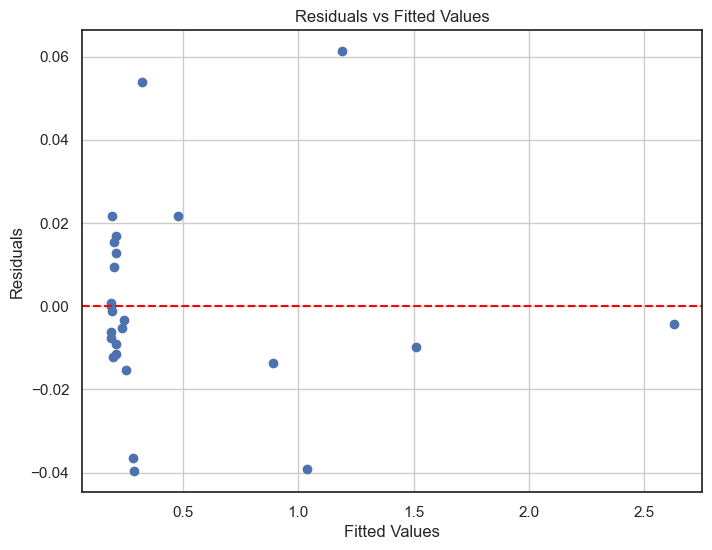

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

Most residuals cluster tightly around 0 (the red dashed line).

However, a few points deviate more strongly, especially for larger fitted values (>1.5).

There is no clear funnel shape or curvature, which is a good sign.!

### The residuals vs. fitted plot supports the validity of OLS assumptions:

No major heteroskedasticity

No serious non-linearity

Model fit is strong overall

## Multiple linear regression: Drop all independent variables except for BoE_base_rate (t-1) as a variable and explore transformation of dependent variable (if possible)

# Re-perform MLR with only the lagged BoE_base_rate Percentage Change as an independent variable. Transformation of dependent variable not straight forward as it contains negative numbers

In [50]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [51]:
# Call the predictions for X (array).
mlr.predict(X)

array([0.1848193 , 0.18919245, 0.1935656 , 0.19793875, 0.2023119 ,
       0.2023119 , 0.20668504, 0.21105819, 0.21543134, 0.21980449,
       0.22417764, 0.22855079, 0.23292394, 0.23729709, 0.24167023,
       0.24604338, 0.25041653, 0.25478968, 0.25916283, 0.26353598,
       0.26790913, 0.27228227, 0.27665542, 0.42971563, 0.58277583,
       0.88889624, 1.04195644, 1.19501665, 1.50113705, 1.80725746,
       2.11337787, 2.72561868])

In [52]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9934531516507876
Intercept:  -0.029464983684990842
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(1.224481628978137))]

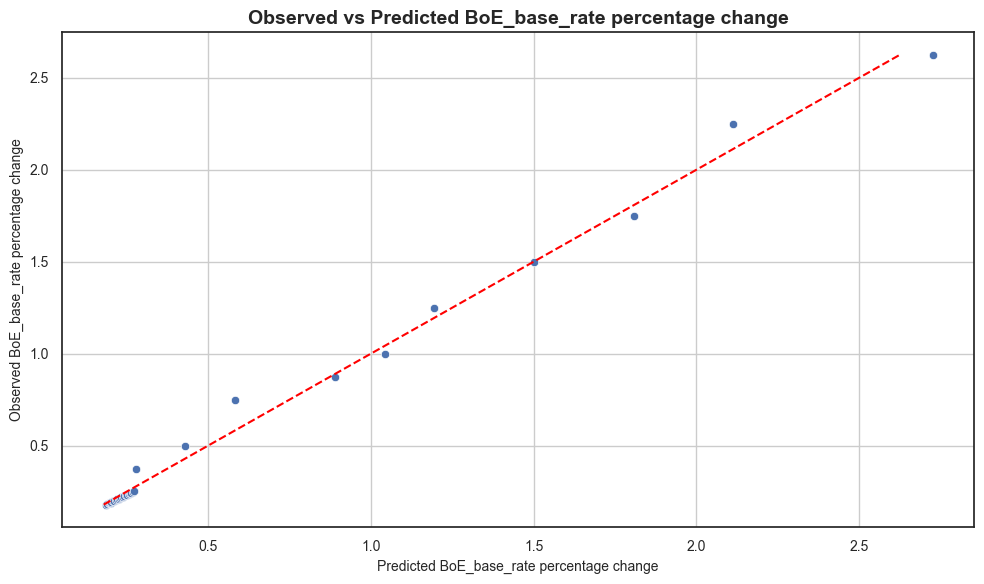

In [54]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

Model Accuracy:

Most points lie very close to the red line, especially across the full range of predicted values.

This indicates a highly accurate model, with strong agreement between predictions and actual outcomes.

No Systematic Bias:

There is no clear over- or under-prediction trend — residuals (errors) are not consistently above or below the line.

Implies low bias and good generalization.

High Predictive Power:

Combined with your earlier metrics (R² = 0.998), this plot confirms that the model captures the structure of the data very well.

The regression model performs exceptionally well in predicting BoE base rate changes.

* There is minimal error, strong linear alignment, and no major outliers.

* This visual evidence supports earlier diagnostics like high R², low residuals, and good QQ/residual plots.

### Training and testing subsets with MLR

In [61]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [62]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.996
Model:                             OLS   Adj. R-squared:                  0.996
Method:                  Least Squares   F-statistic:                     6418.
Date:                 Fri, 16 May 2025   Prob (F-statistic):           1.18e-29
Time:                         18:15:27   Log-Likelihood:                 49.246
No. Observations:                   25   AIC:                            -94.49
Df Residuals:                       23   BIC:                            -92.05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

### Similar R-squared and adj. R-square at similar levels as before, which is great, however there is still signs of potential multicollinearity

In [63]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor               features
0         1.8                  const
1         1.0  BoE_base_rate (t=x-1)


### No multicollinearity observed from the VIF output, because there is only 1 independent variable

In [64]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [65]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(8.111698992069824), 'LM Test p-value': np.float64(0.15018616767706797), 'F-stat': np.float64(1.8251958059837519), 'F-test p-value': np.float64(0.15594483466383735)}


### There is no heteroskedasticity — residuals have constant variance.

### Both p-values are well above 0.05, so there's no statistically significant heteroskedasticity in the model.

### This supports the validity of OLS regression assumptions regarding constant variance of residuals.

# Note to self: tried to log transform the dependent variable BUT didn't work because CPI dataset contains negative numbers

# Given the model output above, multiple linear regression is likely a good ML model to describe inflation. We will explore Random Forest / XGBoost next

In [68]:
regression_df.describe()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),CPI_pct_change (t-3)
count,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2021-06-20 05:15:00,0.548884,0.472321,-26.312500,4.137500,16138.056991,3.075000
min,2020-04-01 00:00:00,0.178571,0.175000,-49.000000,-1.100000,11804.718280,0.200000
25%,2020-10-24 06:00:00,0.202679,0.199107,-33.750000,2.650000,13947.028825,0.700000
50%,2021-06-16 00:00:00,0.230357,0.226786,-27.000000,4.700000,16608.116565,1.750000
75%,2022-02-08 00:00:00,0.562500,0.406250,-15.750000,5.900000,17948.987582,5.175000
max,2022-10-01 00:00:00,2.625000,2.250000,-7.000000,8.900000,19395.493530,10.100000
std,NaN,0.645482,0.525419,11.906728,2.788427,2109.732807,3.073613


In [69]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 367 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           32 non-null     datetime64[ns]
 1   BoE_base_rate (t=x)            32 non-null     float64       
 2   BoE_base_rate (t=x-1)          32 non-null     float64       
 3   confidence_score (t=x)         32 non-null     float64       
 4   wage_growth_rate (t=x-3)       32 non-null     float64       
 5   ftse_250_total_return (t=x-3)  32 non-null     float64       
 6   CPI_pct_change (t-3)           32 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.0 KB


In [70]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),CPI_pct_change (t-3)
367,2020-04-01,0.178571,0.175000,-33.0,2.9,16484.53341,1.8
368,2020-05-01,0.182143,0.178571,-36.0,2.8,15082.33282,1.7
369,2020-06-01,0.185714,0.182143,-27.0,2.2,11804.71828,1.5
370,2020-07-01,0.189286,0.185714,-27.0,0.9,12892.18801,0.8
371,2020-07-01,0.189286,0.189286,-27.0,-0.4,13365.07954,0.5


Root Mean Squared Error: 0.2036
Mean Squared Error: 0.0415
Mean Absolute Error: 0.1073
R² Score: 0.9166


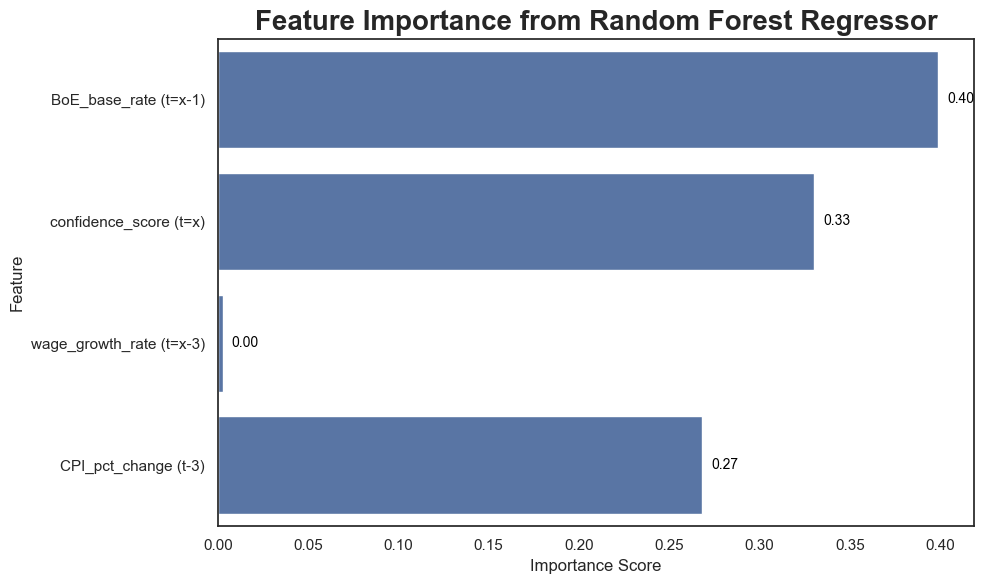

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'BoE_base_rate (t=x)',
        'BoE_base_rate (t=x-1)',
        'confidence_score (t=x)',
        'wage_growth_rate (t=x-3)',
        'ftse_250_total_return (t=x-3)',
        'CPI_pct_change (t-3)'
    ]
)

# Define features and target
X = regression_df[
    [
        'BoE_base_rate (t=x-1)',
        'confidence_score (t=x)',
        'wage_growth_rate (t=x-3)',
        'CPI_pct_change (t-3)',
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

In [84]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),confidence_score (t=x),wage_growth_rate (t=x-3),ftse_250_total_return (t=x-3),CPI_pct_change (t-3)
367,2020-04-01,0.178571,0.175000,-33.0,2.9,16484.53341,1.8
368,2020-05-01,0.182143,0.178571,-36.0,2.8,15082.33282,1.7
369,2020-06-01,0.185714,0.182143,-27.0,2.2,11804.71828,1.5
370,2020-07-01,0.189286,0.185714,-27.0,0.9,12892.18801,0.8
371,2020-07-01,0.189286,0.189286,-27.0,-0.4,13365.07954,0.5


Root Mean Squared Error: 0.1992
Mean Squared Error: 0.0397
Mean Absolute Error: 0.1065
R² Score: 0.9202


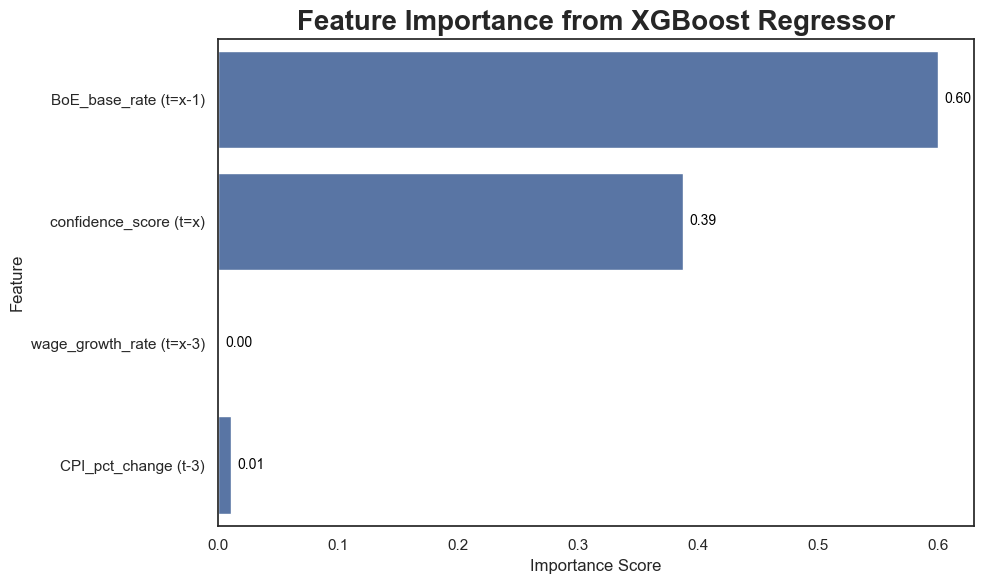

In [88]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
#regression_df = regression_df.dropna(subset=[
  #  'BoE_base_rate (t=x)', 'BoE_base_rate (t=x-1)',
   # 'confidence_score (t=x)', 'wage_growth_rate (t=x-3)',
   # 'ftse_250_total_return (t=x-3)'
#])

# Features and target
X = regression_df[['BoE_base_rate (t=x-1)',
                   'confidence_score (t=x)',
                   'wage_growth_rate (t=x-3)',
                   'CPI_pct_change (t-3)']]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

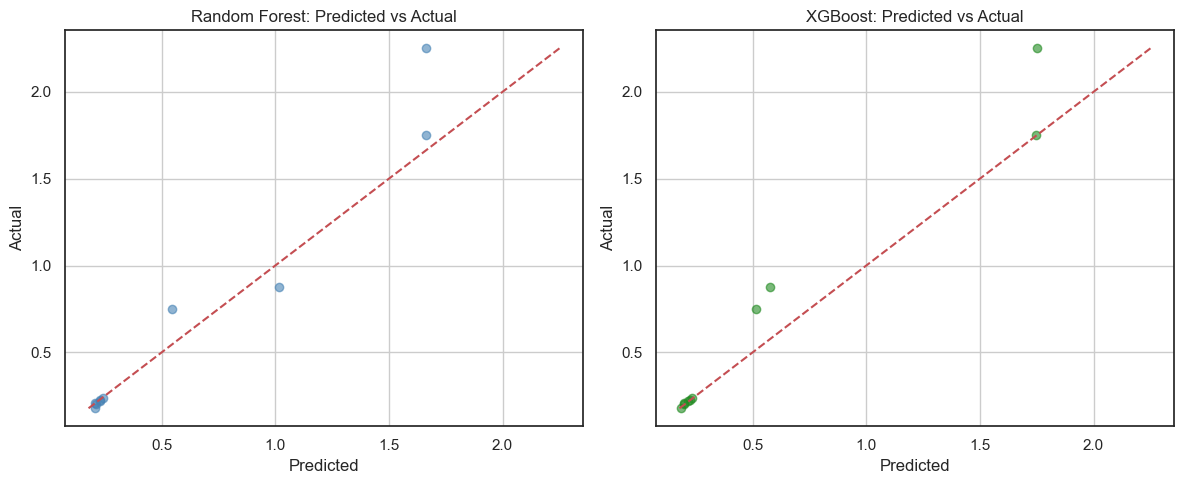

In [90]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models exhibit strong performance in predicting the CPI Percentage Change, with Random Forest slightly outperforming XGBoost across all evaluation metrics. The Random Forest model achieved an R² score of x, a mean absolute error (MAE) of x, and a mean squared error (MSE) of x. In comparison, XGBoost produced an R² score of x, a mean absolute error (MAE) of x, and a mean squared error (MSE) of x. The prediction plots further support this, as Random Forest's predicted values align more closely with the actual values, showing fewer outliers and tighter clustering along the ideal reference line. While both models are reliable and capture the underlying patterns well, XGBoost demonstrates slightly greater accuracy and consistency on this dataset.

XGBoost outperforms Random Forest in this prediction task, showing greater accuracy and consistency.

This makes sense — XGBoost often excels in structured/tabular regression problems due to its boosting framework, which reduces bias and variance more effectively than bagging (used in Random Forest).